#### Copying images to training, validation, and test directories

In [1]:
import os, shutil

In [2]:
original_dataset_dir = '/Users/ferborges@br.ibm.com/Downloads/train'

base_dir = '/Users/ferborges@br.ibm.com/Downloads/train/cats_and_dogs_small'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [3]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [4]:
# Copies the first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range (1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copies the next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range (1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copies the next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range (1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [5]:
# Copies the first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range (1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

# Copies the next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range (1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

# Copies the next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range (1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [6]:
print('Total training cat images: ', len(os.listdir(train_cats_dir)))
print('Total training dog images: ', len(os.listdir(train_dogs_dir)))
print('Total validation cat images: ', len(os.listdir(validation_cats_dir)))
print('Total validation dog images: ', len(os.listdir(validation_dogs_dir)))
print('Total test cat images: ', len(os.listdir(test_cats_dir)))
print('Total test dog images: ', len(os.listdir(test_dogs_dir)))

Total training cat images:  1000
Total training dog images:  1000
Total validation cat images:  500
Total validation dog images:  500
Total test cat images:  500
Total test dog images:  500


#### Instantiating a small convnet for dogs vs cats classification

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Using TensorFlow backend.
W0923 17:16:41.491396 4773696960 deprecation_wrapper.py:119] From /anaconda3/envs/keras-tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0923 17:16:41.534326 4773696960 deprecation_wrapper.py:119] From /anaconda3/envs/keras-tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0923 17:16:41.547065 4773696960 deprecation_wrapper.py:119] From /anaconda3/envs/keras-tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0923 17:16:41.570442 4773696960 deprecation_wrapper.py:119] From /anaconda3/envs/keras-tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

#### Configuring the model for training

In [8]:
from keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

W0923 17:16:41.744721 4773696960 deprecation_wrapper.py:119] From /anaconda3/envs/keras-tensorflow/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0923 17:16:41.753142 4773696960 deprecation_wrapper.py:119] From /anaconda3/envs/keras-tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0923 17:16:41.757003 4773696960 deprecation.py:323] From /anaconda3/envs/keras-tensorflow/lib/python3.6/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


#### Using ImageDataGenerator to read images from directories

In [9]:
from keras.preprocessing.image import ImageDataGenerator

# Rescales all images by 1/255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    #Resizes all images to 150 x 150
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    #Need binary labels because I use binary_crossentropy 
                                                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
for data_batch, labels_batch in train_generator:
    print('data batch shape: ', data_batch.shape)
    print('labels batch shape: ', labels_batch.shape)
    break

data batch shape:  (20, 150, 150, 3)
labels batch shape:  (20,)


#### Fitting the model using a batch generator

In [11]:
history = model.fit_generator(train_generator,
                                steps_per_epoch=100,
                                epochs=30,
                                validation_data=validation_generator,
                                validation_steps=50)

W0923 17:16:42.414551 4773696960 deprecation_wrapper.py:119] From /anaconda3/envs/keras-tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/30
100/100 [==============================] - 57s 569ms/step - loss: 0.6863 - acc: 0.5435 - val_loss: 0.6717 - val_acc: 0.6070
Epoch 2/30
100/100 [==============================] - 40s 404ms/step - loss: 0.6536 - acc: 0.6135 - val_loss: 0.6512 - val_acc: 0.6060
Epoch 3/30
100/100 [==============================] - 38s 385ms/step - loss: 0.6067 - acc: 0.6750 - val_loss: 0.7003 - val_acc: 0.5540
Epoch 4/30
100/100 [==============================] - 39s 391ms/step - loss: 0.5580 - acc: 0.7090 - val_loss: 0.5890 - val_acc: 0.6660
Epoch 5/30
100/100 [==============================] - 39s 387ms/step - loss: 0.5333 - acc: 0.7215 - val_loss: 0.6076 - val_acc: 0.6700
Epoch 6/30
100/100 [==============================] - 39s 393ms/step - loss: 0.5048 - acc: 0.7465 - val_loss: 0.5596 - val_acc: 0.7050
Epoch 7/30
100/100 [==============================] - 39s 393ms/step - loss: 0.4811 - acc: 0.7715 - val_loss: 0.6071 - val_acc: 0.6710
Epoch 8/30
100/100 [==============================] - 4

#### Saving the model

In [12]:
model.save('cats_and_dogs_small_1.h5')

#### Displaying curves of loss and accuracy during training

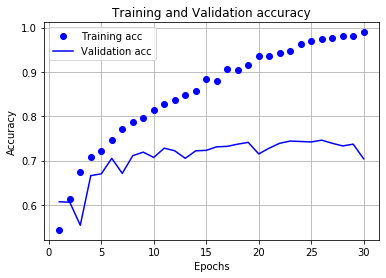

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

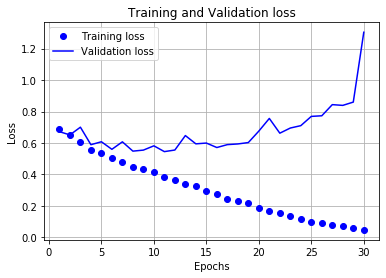

In [14]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

#### Setting up a data augmentation configuration via ImageDataGenerator

In [15]:
datagen = ImageDataGenerator(rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest')

#### Displaying some randomly augmented training images

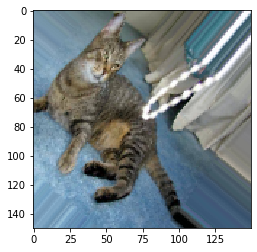

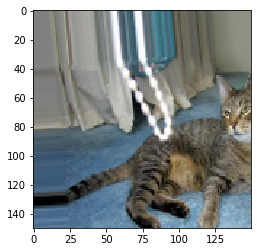

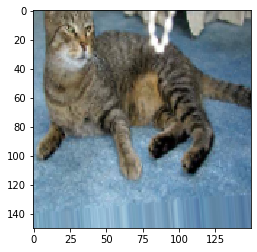

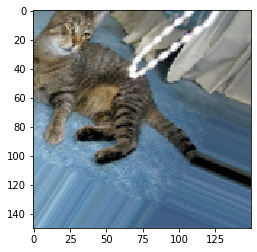

In [16]:
# Modelu . with image-preprocessing utilities
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
#Chooses one image to augment
img_path = fnames[3]
#Reads the image and resizes it
img = image.load_img(img_path, target_size=(150, 150))
#Converts it to a Numpy array with shape (150,150,3)
x = image.img_to_array(img)
#Reshapes it to (1,150,150,3)
x = x.reshape((1,) + x.shape)

#Generates batches of randomly transformed images. Loops indefinitely, so you need to break the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

#### Defining a new convnet that includes dropout

In [17]:
from keras.layers import Dropout

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

W0923 17:36:49.921223 4773696960 deprecation.py:506] From /anaconda3/envs/keras-tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [18]:
model.compile(loss = 'binary_crossentropy',
                    optimizer=RMSprop(lr=1e-4),
                    metrics = ['acc'])

#### Training the convnet usign data-augmentation generators

In [19]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(validation_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=32,
                                                        class_mode='binary')

Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [20]:
history = model.fit_generator(train_generator,
                                steps_per_epoch=100,
                                epochs=100,
                                validation_data=validation_generator,
                                validation_steps=50)

Epoch 1/100
100/100 [==============================] - 63s 629ms/step - loss: 0.6911 - acc: 0.5213 - val_loss: 0.7271 - val_acc: 0.4949
Epoch 2/100
100/100 [==============================] - 60s 602ms/step - loss: 0.6753 - acc: 0.5660 - val_loss: 0.6503 - val_acc: 0.6366
Epoch 3/100
100/100 [==============================] - 60s 601ms/step - loss: 0.6599 - acc: 0.6000 - val_loss: 0.6720 - val_acc: 0.5825
Epoch 4/100
100/100 [==============================] - 63s 627ms/step - loss: 0.6472 - acc: 0.6122 - val_loss: 0.6049 - val_acc: 0.6521
Epoch 5/100
100/100 [==============================] - 60s 603ms/step - loss: 0.6232 - acc: 0.6462 - val_loss: 0.5892 - val_acc: 0.6675
Epoch 6/100
100/100 [==============================] - 60s 601ms/step - loss: 0.6136 - acc: 0.6585 - val_loss: 0.5732 - val_acc: 0.6856
Epoch 7/100
100/100 [==============================] - 61s 608ms/step - loss: 0.5958 - acc: 0.6669 - val_loss: 0.5428 - val_acc: 0.7094
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 80s 804ms/step - loss: 0.3504 - acc: 0.8403 - val_loss: 0.2901 - val_acc: 0.8582
Epoch 62/100
100/100 [==============================] - 87s 871ms/step - loss: 0.3627 - acc: 0.8341 - val_loss: 0.3000 - val_acc: 0.8871
Epoch 63/100
100/100 [==============================] - 101s 1s/step - loss: 0.3421 - acc: 0.8462 - val_loss: 0.2961 - val_acc: 0.8692
Epoch 64/100
100/100 [==============================] - 104s 1s/step - loss: 0.3343 - acc: 0.8484 - val_loss: 0.5219 - val_acc: 0.7874
Epoch 65/100
100/100 [==============================] - 103s 1s/step - loss: 0.3449 - acc: 0.8481 - val_loss: 0.2408 - val_acc: 0.9118
Epoch 66/100
100/100 [==============================] - 103s 1s/step - loss: 0.3306 - acc: 0.8544 - val_loss: 0.2147 - val_acc: 0.9072
Epoch 67/100
100/100 [==============================] - 94s 942ms/step - loss: 0.3483 - acc: 0.8453 - val_loss: 0.2331 - val_acc: 0.8883
Epoch 68/100
100/100 [===========================

In [21]:
In [19]: model.save('cats_and_dogs_small_2.h5')

#### Displaying curves of loss and accuracy during training

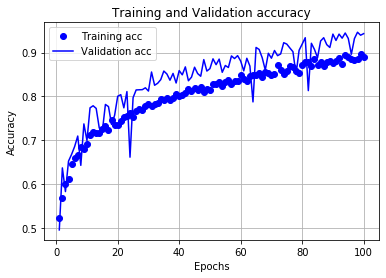

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

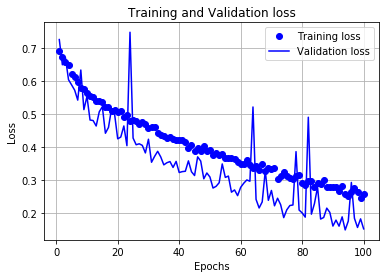

In [23]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()